## A step-by-step guide to Introduction to Stats in Python

Follow along with [this article](https://www.learndatasci.com/tutorials/data-science-statistics-using-python/). Fork and clone this repository to your computer and open with Juypter Notebooks. <br>

#### We suggest that instead of copy and pasting the code, you type it out.  This will help you become more familiar with the syntex and better understand it.

Meet Sally, a public school administrator. Some schools in her state of Tennessee are performing below average academically. Her superintendent, under pressure from frustrated parents and voters, approached Sally with the task of understanding why these schools are under-performing. Not an easy problem, to be sure.

To improve school performance, Sally needs to learn more about these schools and their students, just as a business needs to understand its own strengths and weaknesses and its customers.

Though Sally is eager to build an impressive explanatory model, she knows the importance of conducting preliminary research to prevent possible pitfalls or blind spots (e.g. cognitive bias'). Thus, she engages in a thorough exploratory analysis, which includes: a lit review, data collection, descriptive and inferential statistics, and data visualization.

First Sally imports the libries she will use with alias and sets her plot style and font size and creates a data frame with her data.

In [2]:
# Import libries need with alias
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and font size
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

# Read in TN middle school dataset(hint it should be in the same folder as this noteboke)
df = pd.read_csv('middle_tn_schools.csv')


To begin learning about the sample, Sally uses pandas' describe method. The column headers in bold text represent the variables Sally will be exploring. Each row header represents a descriptive statistic about the corresponding column.

In [3]:
# Run decriptive analysis
df.describe()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,347.000000,347.000000,347.000000,347.000000,341.000000,347.000000,341.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,2.968300,699.472622,50.279539,58.801729,58.249267,15.461671,57.004692,57.049856,44.939481,21.197983,61.673487,2.642651,11.164553
std,1.690377,400.598636,25.480236,32.540747,32.702630,5.725170,26.696450,27.968974,22.053386,23.562538,27.274859,3.109629,12.030608
min,0.000000,53.000000,2.000000,0.200000,0.600000,4.700000,1.500000,0.100000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,420.500000,30.000000,30.950000,27.100000,13.700000,37.600000,37.000000,30.000000,3.600000,40.600000,0.750000,3.800000
50%,3.000000,595.000000,51.000000,66.400000,65.800000,15.000000,61.800000,60.700000,40.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.500000,88.000000,88.600000,16.700000,79.600000,80.250000,54.000000,28.350000,85.950000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


Sally isolates reduced_lunch and groups the data by school_rating using pandas' groupbymethod and then uses describe on the re-shaped data.

In [5]:
# Use group by method, first by reduced_lunch and then by school_rating
# Use describe on the reshaped data
df[['reduced_lunch', 'school_rating']].groupby(['school_rating']).describe()


reduced_lunch                                                  \
                      count       mean        std   min    25%   50%    75%   
school_rating                                                                 
0.0                    43.0  83.581395   8.813498  53.0  79.50  86.0  90.00   
1.0                    40.0  74.950000  11.644191  53.0  65.00  74.5  84.25   
2.0                    44.0  64.272727  11.956051  37.0  54.75  62.5  74.00   
3.0                    56.0  50.285714  13.550866  24.0  41.00  48.5  63.00   
4.0                    86.0  41.000000  16.681092   4.0  30.00  41.5  50.00   
5.0                    78.0  21.602564  17.651268   2.0   8.00  19.0  29.75   

                     
                max  
school_rating        
0.0            98.0  
1.0            98.0  
2.0            88.0  
3.0            78.0  
4.0            87.0  
5.0            87.0

Sally decides to look at reduced_lunch from another angle using a correlation matrix with pandas' corr method. The values in the correlation matrix table will be between -1 and 1.

In [6]:
# Create a correlation matrix table with these variables: reduced_lunch and school_rating
df[['reduced_lunch', 'school_rating']].corr()

,reduced_lunch,school_rating
reduced_lunch,1.000000,-0.815757
school_rating,-0.815757,1.000000


Sally learns a box-and-whisker plot is helpful for visualizing the distribution of the data from the mean. She graphs reduced_lunch to see the distributions.

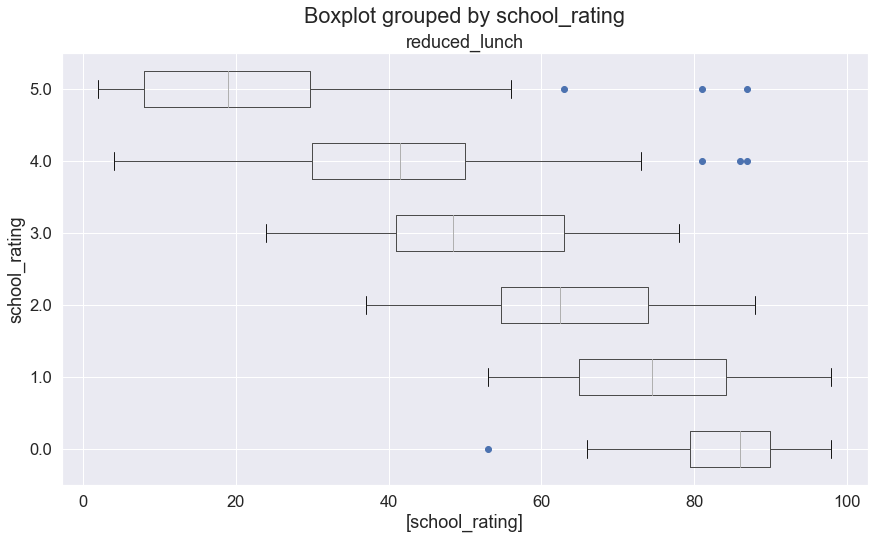

In [7]:
# Create boxplot with two variables: reduced_lunch and school_rating
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('school_rating')
_ = df[['reduced_lunch', 'school_rating']].boxplot(by='school_rating', figsize=(13,8),
                                                   vert=False, sym='b', ax=ax)

To further examine the relationship between school_rating and reduced_lunch, Sally graphs the two variables on a scatter plot. 

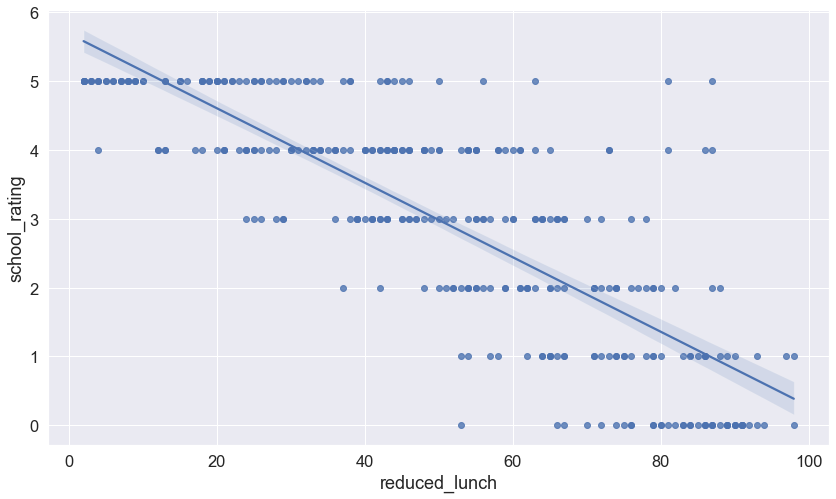

In [8]:
# Create scatter plot with two variables reduced_lunch and school_rating
plt.figure(figsize=(14,8))
_ = sns.regplot(data=df, x='reduced_lunch', y='school_rating')


Sally is ready to test her hypothesis: a negative relationship exists between school_rating and reduced_lunch. If the test fails, she'll need to re-visit her dataset to choose other variables that possibly explain school_rating. Either way, Sally could benefit from an efficient way of assessing relationships among her variables.

An efficient graph for assessing relationships is the correlation matrix; Red cells indicate positive correlation; blue cells indicate negative correlation; white cells indicate no correlation. The darker the colors, the stronger the correlation (positive or negative) between those two variables.

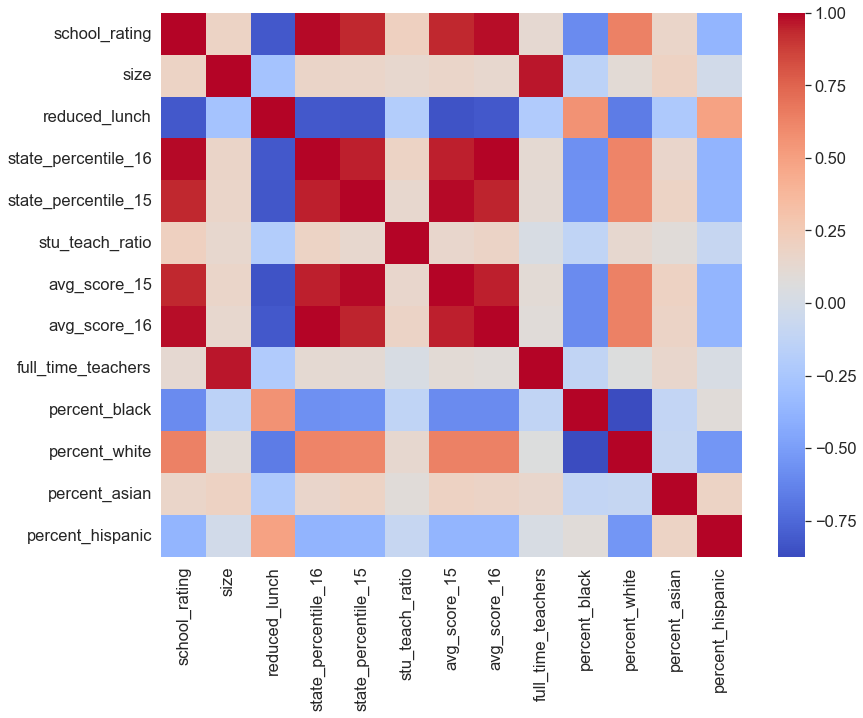

In [9]:
# Create tabular correlation matrix
corr = df.corr()
_, ax = plt.subplots(figsize=(13,10))
# Graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values,
               cmap='coolwarm')

### Things to think about
What are your thoughts on Sally's hypothesis: a negative relationship exists between school_rating and reduced_lunch?

This would be true given the direction of the linear regression.

Looking at the above correlation matrix are there any other relationships you would like to explore? 


School_rating and percent_hispanic

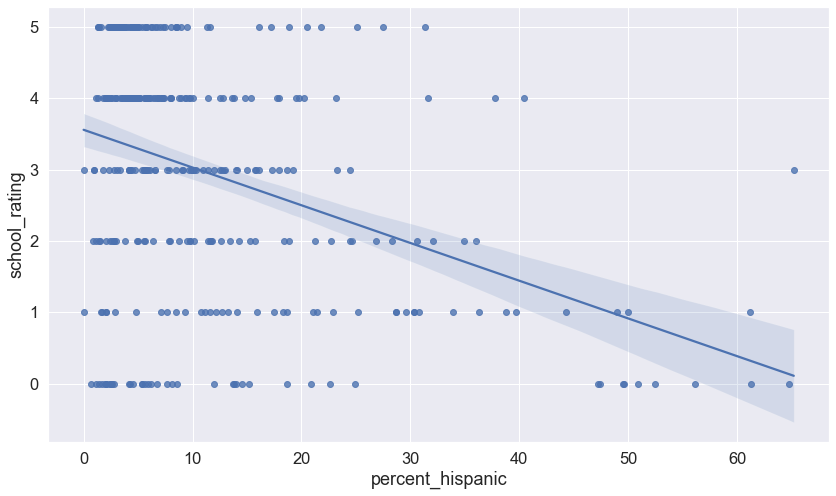

In [10]:
plt.figure(figsize=(14,8))
_ = sns.regplot(data=df, x='percent_hispanic', y='school_rating')